In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1) Which countries are F1 constructors from?

In [18]:
constructors = pd.read_csv('constructors.csv', dtype = {'nationality': str})
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [19]:
#find the number of unique nationalities represented
len(constructors.groupby('nationality').count()['constructorRef'])

24

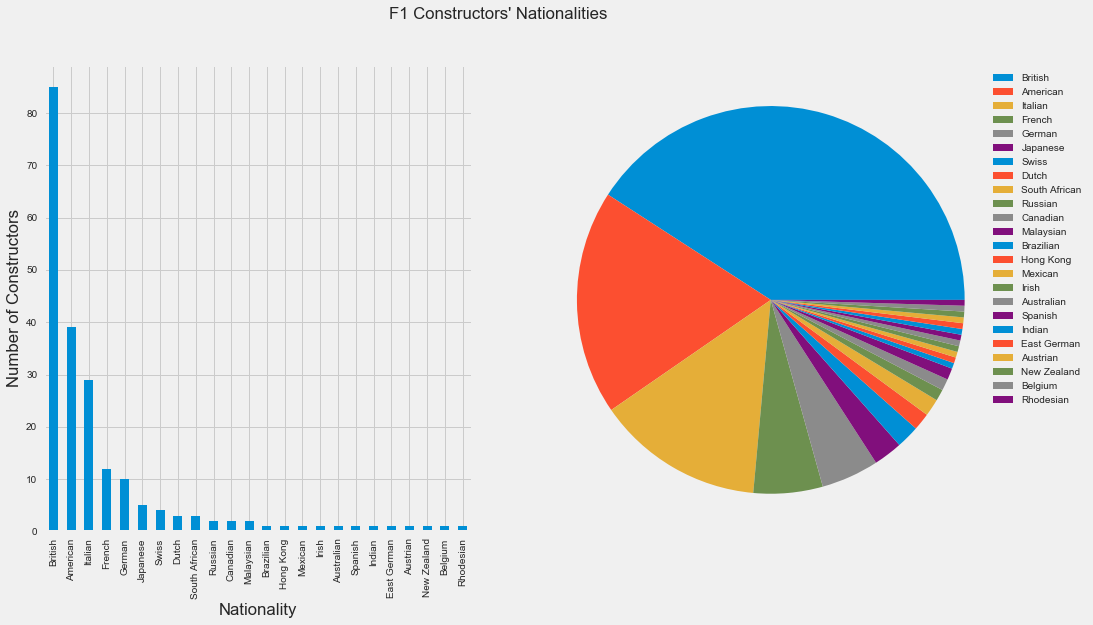

In [97]:
#set dataframe
countries = pd.DataFrame(constructors.nationality.value_counts(), columns = ['nationality'])

plt.style.use('fivethirtyeight')

#chart results
plt.figure(figsize = (15,8))
plt.suptitle('F1 Constructors\' Nationalities')

plt.subplot(1,2,1)
constructors.nationality.value_counts().head(24).plot(kind = 'bar')
plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')

plt.subplot(1,2,2)
plt.pie(countries)
plt.axis('equal')
plt.legend(countries.index, bbox_to_anchor = (1.25, 1), loc = 'upper right')
plt.show()

We can see that the vast majority of Formula 1 teams throughout history have called the United Kingdom home. The USA, Italy, France, and Germany are also popular countries to set up shop. We can see from the constructor's data that 208 separate constructors have at one time participated in the F1 World Championship, but most were short lived and are now defunct. Let's see which teams have participated in the most races.

### 2) Which F1 constructors have participated in the most races?

In [58]:
results = pd.read_csv('results.csv')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [22]:
active_cons_25 = pd.DataFrame(results.constructorId.value_counts())
active_cons_25.rename(columns = {'constructorId':'numRaces'}, inplace = True)
active_cons_25.head()

,numRaces
6,2140
1,1625
3,1379
25,881
32,871


In [23]:
join_cons_res = constructors.set_index('constructorId').join(active_cons_25, lsuffix = 'cons', rsuffix = 'res')
join_cons_res = join_cons_res.sort_values('numRaces', ascending = False)
join_cons_res.head()

,constructorRef,name,nationality,url,Unnamed: 5,numRaces
constructorId,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881.0
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0


In [49]:
join_cons_res_25 = join_cons_res.head(25)
join_cons_res_25['numRaces'] = join_cons_res_25['numRaces'].astype(str).str[:-2].astype(np.int64) #handle the decimal point
join_cons_res_25.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,constructorRef,name,nationality,url,Unnamed: 5,numRaces
constructorId,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871


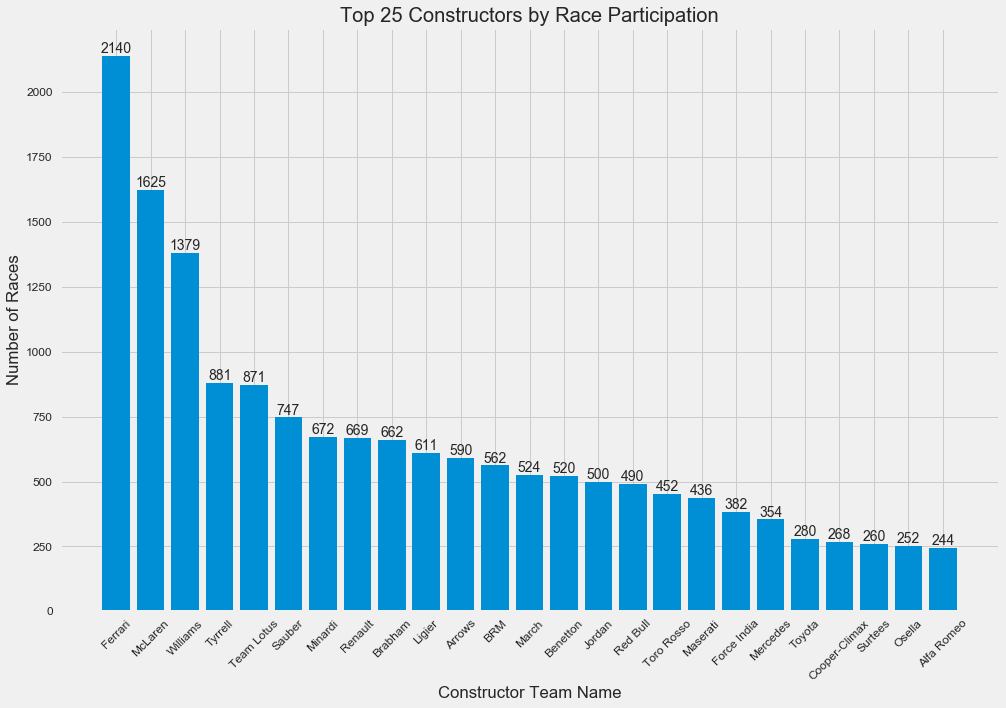

In [89]:
x_races = join_cons_res_25['name']
y_races = join_cons_res_25['numRaces']
numRaces_values = [] #initiate an empty list to put values into

for value in join_cons_res_25['numRaces']: #loop to populate list
    numRaces_values.append(value)
    
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_numRaces = plt.bar(range(len(x_races)), y_races)

rects = plt_numRaces.patches

for rect, value in zip(rects, numRaces_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_races)), join_cons_res_25['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Races')
plt.xlabel('Constructor Team Name')
plt.title('Top 25 Constructors by Race Participation')

### 3) How do these race totals compare to the constructors' win totals?

In [29]:
cons_wins = results.loc[lambda df: results['positionOrder'] == 1, :]
cons_wins = pd.DataFrame(cons_wins.constructorId.value_counts())
cons_wins.rename(columns = {'constructorId':'numWins'}, inplace = True)
cons_wins.head()

,numWins
6,230
1,178
3,114
131,76
9,55


In [30]:
join_cons_wins = join_cons_res.join(cons_wins)
join_cons_wins_25 = join_cons_wins.head(25)
join_cons_wins_25.head()

,constructorRef,name,nationality,url,Unnamed: 5,numRaces,numWins
constructorId,,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0,230.0
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0,178.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0,114.0
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881.0,23.0
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0,45.0


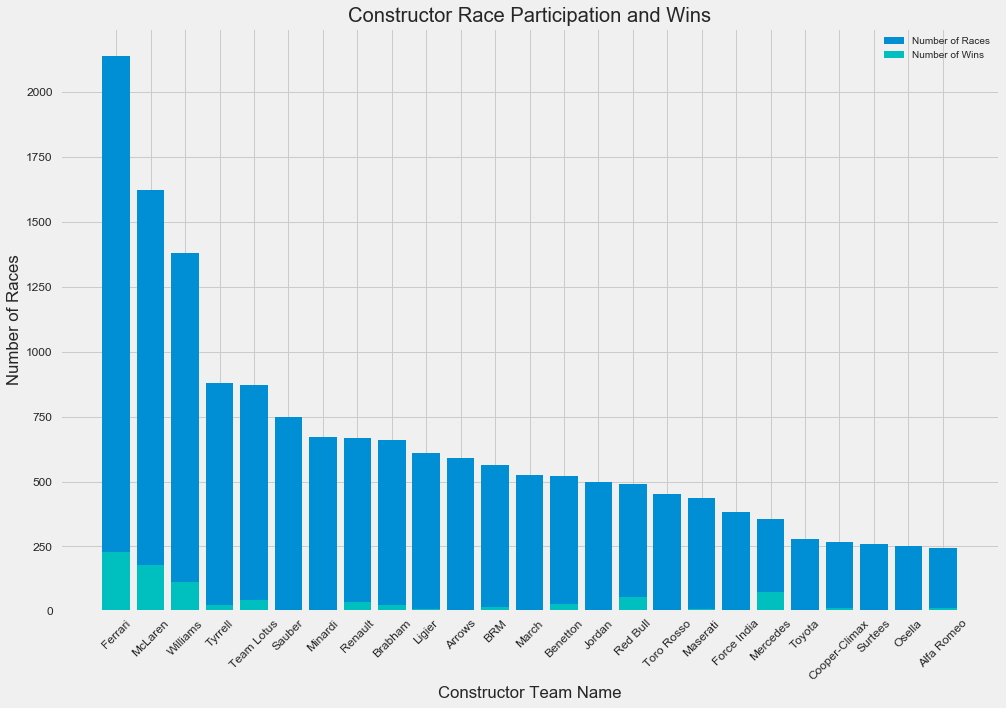

In [90]:
x_wins = range(len(join_cons_wins_25['name']))
y_wins = join_cons_wins_25['numWins']

plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt.xticks(range(len(x_wins)), join_cons_wins_25['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt_races = plt.bar(range(len(x_races)), y_races)
plt_wins = plt.bar(x_wins, y_wins, color = 'c')
plt.legend((plt_races[0], plt_wins[0]), ('Number of Races', 'Number of Wins'), loc = "upper right")
plt.xlabel('Constructor Team Name')
plt.ylabel('Number of Races')
plt.title('Constructor Race Participation and Wins')

### 4) Let's compare aggregate race wins to the proportion of races won

Here we are stepping back out of our 25 most active teams and referring to the entire results dataset

In [135]:
win_pct = pd.DataFrame((join_cons_wins['numWins'] / join_cons_wins['numRaces']) * 100)
win_pct = join_cons_wins.join(win_pct) #join with our working dataframe
win_pct.rename(columns = {0: 'winPercentage'}, inplace = True)
win_pct = win_pct.dropna(subset = ['winPercentage']) #drop teams that haven't won
win_pct = win_pct.round(decimals = 2) #round columns
win_pct = win_pct.sort_values('winPercentage', ascending = False) #sort by win percentagelen()
win_pct.head()

,constructorRef,name,nationality,url,Unnamed: 5,numRaces,numWins,winPercentage
constructorId,,,,,,,,
23,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,NaN,34.0,8.0,23.53
196,matra-ford,Matra-Ford,French,http://en.wikipedia.org/wiki/Matra,NaN,40.0,9.0,22.50
131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,NaN,354.0,76.0,21.47
118,vanwall,Vanwall,British,http://en.wikipedia.org/wiki/Vanwall,NaN,71.0,10.0,14.08
107,watson,Watson,American,http://en.wikipedia.org/wiki/A.J._Watson,NaN,22.0,3.0,13.64


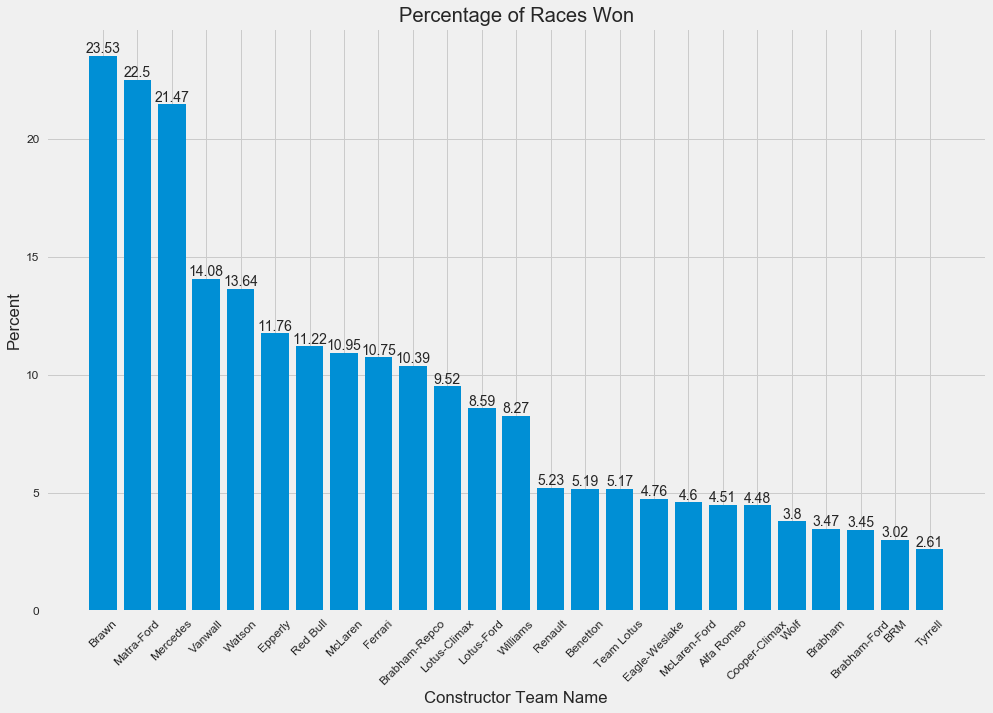

In [137]:
x_win_pct = win_pct.head(25)['name']
y_win_pct = win_pct.head(25)['winPercentage']
win_values = [] #initiate an empty list to put values into

for value in win_pct.head(25)['winPercentage']: #loop to populate list
    win_values.append(value)
    
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_win_pct = plt.bar(range(len(x_win_pct)), y_win_pct)

rects = plt_win_pct.patches

for rect, value in zip(rects, win_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_win_pct)), win_pct['name'], fontsize = 12, rotation = 45)
plt.xlabel('Constructor Team Name')
plt.yticks(fontsize = 12)
plt.ylabel('Percent')
plt.title('Percentage of Races Won')

plt.show()

### 5) Race wins isn't the only measure of success in F1. Lets approach this from a points scored angle

In [167]:
constructor_results = pd.read_csv('constructorResults.csv') #set a df from our constructor results dataset
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [162]:
total_points = pd.DataFrame(constructor_results.groupby('constructorId').sum()['points'])
total_points = win_pct.join(total_points) #join with our working df
total_points.rename(columns = {'points':'totalPoints'}, inplace = True)
total_points = total_points.sort_values('totalPoints', ascending = False)
total_points.head()

,constructorRef,name,nationality,url,Unnamed: 5,numRaces,numWins,winPercentage,totalPoints
constructorId,,,,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0,230.0,10.75,7230.5
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0,178.0,10.95,5245.5
9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,NaN,490.0,55.0,11.22,3888.5
131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,NaN,354.0,76.0,21.47,3718.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0,114.0,8.27,3565.0


A note on how the FIA awards points for suspended races: If a race is suspended and cannot be restarted, full points are awarded as long as 75% of the total race distance has been completed. If less than 75% has been completed, half points are award (this how we get fractional point totals). If less than 2 laps of the race have been completed, no points are awarded.

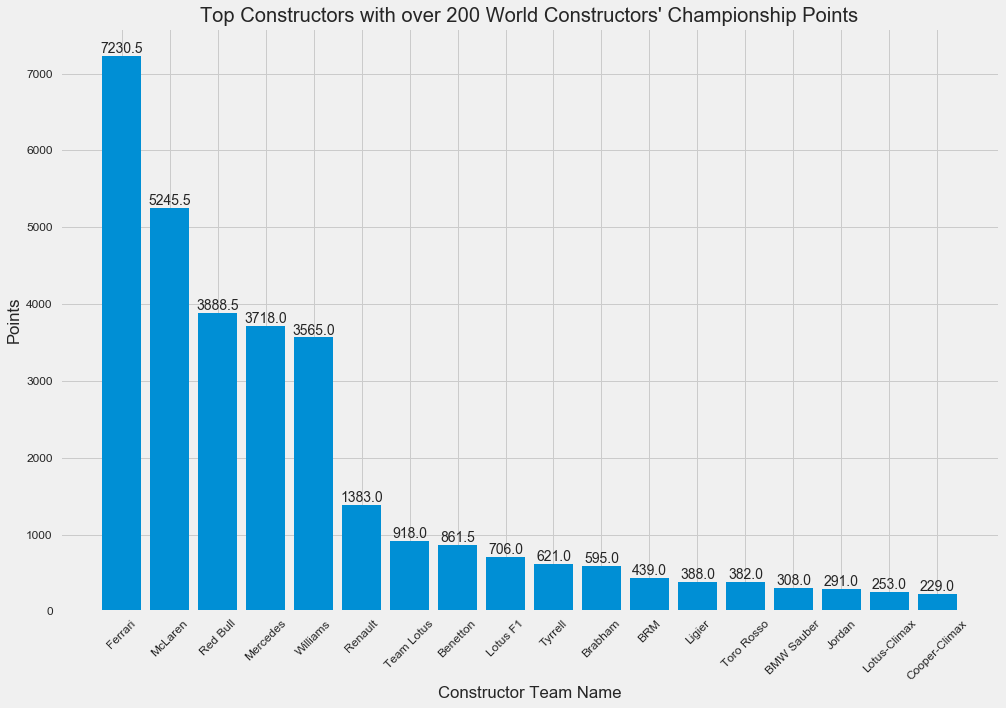

In [143]:
total_points_200 = total_points[total_points.totalPoints >= 200] #drop teams that have scored less than 100 points

x_points = total_points_200['name']
y_points = total_points_200['totalPoints']
totalPoints_values = [] #initiate an empty list to put values into
   
for value in total_points_200['totalPoints']: #loop to populate list
    totalPoints_values.append(value)
    
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))
plt_totalPoints = plt.bar(range(len(x_points)), y_points)

rects = plt_totalPoints.patches

for rect, value in zip(rects, totalPoints_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_points)), total_points.head(25)['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.ylabel('Points')
plt.xlabel('Constructor Team Name')
plt.title('Top Constructors with over 200 World Constructors\' Championship Points')

### 6) Let's see which team is the most efficient at scoring points

In [171]:
points_per_race = pd.DataFrame(total_points['totalPoints'] / total_points['numRaces'])
points_per_race = total_points.join(points_per_race)
points_per_race.rename(columns = {0:'pointsPerRace'}, inplace = True)
points_per_race = points_per_race.round(decimals = 2) #round columns
points_per_race = points_per_race.sort_values('pointsPerRace', ascending = False)
points_per_race2 = points_per_race.iloc[np.r_[0:5, -5:0]] #show the first and last rows together to make a point
points_per_race2

,constructorRef,name,nationality,url,Unnamed: 5,numRaces,numWins,winPercentage,totalPoints,pointsPerRace
constructorId,,,,,,,,,,
131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,NaN,354.0,76.0,21.47,3718.0,10.50
9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,NaN,490.0,55.0,11.22,3888.5,7.94
23,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,NaN,34.0,8.0,23.53,172.0,5.06
208,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1,NaN,154.0,2.0,1.30,706.0,4.58
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0,230.0,10.75,7230.5,3.38
176,lotus-brm,Lotus-BRM,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,121.0,1.0,0.83,29.0,0.24
51,alfa,Alfa Romeo,Italian,http://en.wikipedia.org/wiki/Alfa_Romeo_(Formu...,NaN,244.0,11.0,4.51,50.0,0.20
105,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati,NaN,436.0,9.0,2.06,34.0,0.08
114,kuzma,Kuzma,American,http://en.wikipedia.org/wiki/Kuzma_(constructor),NaN,39.0,1.0,2.56,0.0,0.00


I'm showing you the first and last 5 rows of this dataframe for a reason - there's something strange going on here, can you spot it?

The two American teams, Kuzma and Kurtis Kraft, in the last rows have registered wins but have been awarded no points. Before 1984, not every single race billed as a "Formula One" race actually counted towards the World Championship. The 6 wins that these teams combined for were all at the Indianapolis 500, and in fact the Indy 500 was the only F1 race these teams would ever enter. However, the 500 was included in the World Championship during this time. The reason that their wins are recorded but their points aren't is a matter of record keeping. Indy 500 results for teams that didn't participate in the rest of the World Championship were often excluded from the World Championship records, which helps explain why the points these teams scored are not included here. 

sources: https://en.wikipedia.org/wiki/Formula_One#Distinction_between_Formula_One_and_World_Championship_races, https://en.wikipedia.org/wiki/Kuzma_(constructor), https://en.wikipedia.org/wiki/Kurtis_Kraft

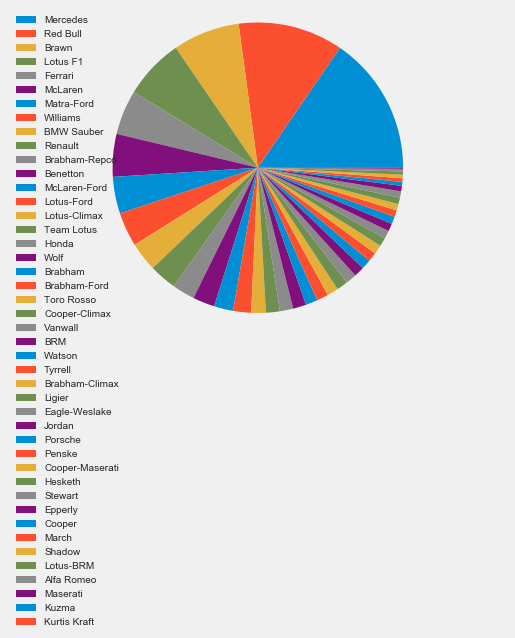

In [190]:
#lets get back on track
df = pd.DataFrame(points_per_race['pointsPerRace'])

from matplotlib import cm #import colors
#cs = cm.Set1(np.arange(44)/44.)
plt.style.use('fivethirtyeight')

points_pie = plt.pie(df)
#points_pie.set_color_cycle(cs)
plt.axis('equal')
plt.legend(points_per_race.name)
plt.show()


#countries = pd.DataFrame(constructors.nationality.value_counts(), columns = ['nationality'])

#plt.style.use('fivethirtyeight')

#chart results
#plt.figure(figsize = (15,8))
#plt.suptitle('F1 Constructors\' Nationalities')

#plt.subplot(1,2,1)
#constructors.nationality.value_counts().head(24).plot(kind = 'bar')
#plt.xlabel('Nationality')
#plt.ylabel('Number of Constructors')

#plt.subplot(1,2,2)
#plt.pie(countries)
#plt.axis('equal')
#plt.legend(countries.index, bbox_to_anchor = (1.25, 1), loc = 'upper right')
#plt.show()

In [178]:
len(points_per_race)

44